**1. importing file from drive to content**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi


Tue Mar  7 19:51:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**2. Calling all libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.fixes import sklearn
from sklearn import preprocessing, utils
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils


import joblib
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

import seaborn as sns

In [4]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


**3. Reading csv file using pandas dataframe**

In [5]:
df = pd.read_csv('/content/drive/MyDrive/MIZZOU/DigitalTwin_AT&T/_2023_DigitalTwinCodes/_20230224_SVR_DecisionTreeScripts/20230224_weather_OccupancyBased.csv')
df = df.iloc[:743,1:] #sparsing columns and rows
print(df.head(3))
df.columns

    id       timestamp             Day  Temperature (degC)  Humidity (%)  \
0  0.0  10/1/2022 0:00  10/1/2022 0:00               11.06          71.0   
1  1.0  10/1/2022 1:00  10/1/2022 1:00                9.83          77.0   
2  2.0  10/1/2022 2:00  10/1/2022 2:00                8.50          82.0   

   Wind Speed (m/s)  Wind Direction (deg)  Pressure (hPa)  PeopleCount(p)  \
0               1.0                  96.0          1020.0            10.0   
1               1.0                  90.0          1020.0             4.0   
2               1.0                  92.0          1020.0             0.0   

   PeoplePerArea(p/m2)  LightingPower(W)  LightingPowerIntensity(W/m2)  \
0             0.038662             300.0                      1.159869   
1             0.015465             300.0                      1.159869   
2             0.000000               0.0                      0.000000   

   EquipmentLoad(W)  EquipmentPowerIntensity(W/m2)  VentilationRate (m3/s)  \
0          

Index(['id', 'timestamp', 'Day', 'Temperature (degC)', 'Humidity (%)',
       'Wind Speed (m/s)', 'Wind Direction (deg)', 'Pressure (hPa)',
       'PeopleCount(p)', 'PeoplePerArea(p/m2)', 'LightingPower(W)',
       'LightingPowerIntensity(W/m2)', 'EquipmentLoad(W)',
       'EquipmentPowerIntensity(W/m2)', 'VentilationRate (m3/s)', 'ACH',
       'CarbonEmissions(lb-co2/h)'],
      dtype='object')

**4. Removing unwanted columns from the dataset**

In [6]:
df.drop(['id', 'timestamp', 'Day','PeopleCount(p)','LightingPower(W)','EquipmentLoad(W)','VentilationRate (m3/s)'], axis =1, inplace=True)
df.head(3)

,Temperature (degC),Humidity (%),Wind Speed (m/s),Wind Direction (deg),Pressure (hPa),PeoplePerArea(p/m2),LightingPowerIntensity(W/m2),EquipmentPowerIntensity(W/m2),ACH,CarbonEmissions(lb-co2/h)
0,11.06,71.0,1.0,96.0,1020.0,0.038662,1.159869,0.337908,1.034237,1.977770
1,9.83,77.0,1.0,90.0,1020.0,0.015465,1.159869,0.314711,0.711153,1.923205
2,8.50,82.0,1.0,92.0,1020.0,0.000000,0.000000,0.299246,0.495763,1.761687


**5. Taking X for input of ML and y for output**

In [7]:
#X = df[['PeoplePerArea(p/m2)','LightingPowerIntensity(W/m2)','EquipmentPowerIntensity(W/m2)','ACH']]
X = df[['Temperature (degC)','Humidity (%)','Wind Speed (m/s)','Wind Direction (deg)','Pressure (hPa)','PeoplePerArea(p/m2)','LightingPowerIntensity(W/m2)','EquipmentPowerIntensity(W/m2)','ACH']]
y = df['CarbonEmissions(lb-co2/h)']


In [8]:
y

0      1.977770
1      1.923205
2      1.761687
3      1.761687
4      1.761687
         ...   
738    1.923205
739    1.923205
740    1.907923
741    1.761687
742    1.761687
Name: CarbonEmissions(lb-co2/h), Length: 743, dtype: float64

**6. Random State**

In [9]:

# # Array of random_state values from 0 to 400
# random_states = np.arange(start=0, stop=5000)

# # Initialize a list where we'll store the score of each random_state
# scores = []

# # Initialize search
# for state in random_states:
#     X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=state)
#     svr_linear = SVR(kernel='linear',gamma='scale', C=5, epsilon=0.3)
#     svr_linear.fit(X_train,y_train)
#     scores.append(svr_linear.score(X_test, y_test))

# results = pd.DataFrame({'random_state':random_states, 'score':scores})
# RandomState_df = results[results['score'] == results['score'].max()]
# RandomState = RandomState_df.iloc[0][0].astype(int)
# print("The best Random State Value of this dataset is:", RandomState)

In [10]:
# Array of random_state values from 0 to 5000
random_states = np.arange(start=0, stop=5000)

# Initialize a list where we'll store the score of each random_state
scores = []

# Initialize search
for state in random_states:
    # Split the data into training and testing sets using the random_state value
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
    
    # Train the Decision Tree model
    dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=0)
    dt.fit(X_train, y_train)
    
    # Calculate the score on the testing set and append to scores list
    score = dt.score(X_test, y_test)
    scores.append(score)

# Create a dataframe of the results
results = pd.DataFrame({'random_state': random_states, 'score': scores})

# Find the random state with the highest score
best_random_state = results.loc[results['score'].idxmax(), 'random_state']
print("Best Random State:", best_random_state)


Best Random State: 2365


**7. Learning Curve**

In [11]:


# #Using the random state number for further learning curve and predictions
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=RandomState)

# #Learning curve
# # https://nvsyashwanth.github.io/machinelearningmaster/learning-curves/
# regressor=LinearRegression()
# regressor.fit(X_train,y_train)
# predictions=regressor.predict(X_test)
# plt.figure(1,figsize=(20,10))
# train_errors=[]
# val_errors=[]
# for i in range(1,len(X_train)):
#     regressor.fit(X_train[:i],y_train[:i])
#     train_preds=regressor.predict(X_train[:i])
#     val_preds=regressor.predict(X_test)
#     train_errors.append(mse(train_preds,y_train[:i]))
#     val_errors.append(mse(val_preds,y_test))
# plt.plot(range(1,len(X_train)),np.sqrt(train_errors),label='Training error')
# plt.plot(range(1,len(X_train)),np.sqrt(val_errors),label='Validation error')
# plt.title('Learning Curves')    
# plt.xlabel('Train set (sample) size')
# plt.ylabel('RMSE')
# plt.legend()
# plt.show()

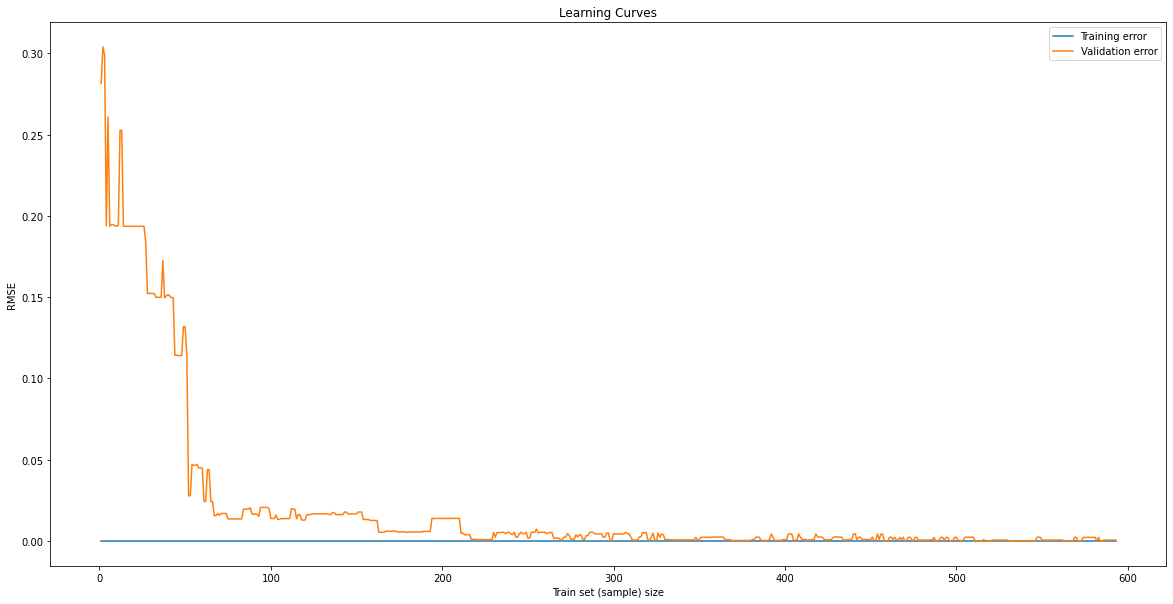

In [12]:


#Using the random state number for further learning curve and predictions
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=best_random_state)

#Learning curve
# https://nvsyashwanth.github.io/machinelearningmaster/learning-curves/
regressor = DecisionTreeRegressor(random_state=best_random_state)
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)

plt.figure(1,figsize=(20,10))
train_errors=[]
val_errors=[]
for i in range(1,len(X_train)):
    regressor.fit(X_train[:i],y_train[:i])
    train_preds=regressor.predict(X_train[:i])
    val_preds=regressor.predict(X_test)
    train_errors.append(mse(train_preds,y_train[:i]))
    val_errors.append(mse(val_preds,y_test))
plt.plot(range(1,len(X_train)),np.sqrt(train_errors),label='Training error')
plt.plot(range(1,len(X_train)),np.sqrt(val_errors),label='Validation error')
plt.title('Learning Curves')    
plt.xlabel('Train set (sample) size')
plt.ylabel('RMSE')
plt.legend()
plt.show()


**8. K-Fold Cross-validation**

In [13]:
# params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.3,0.4,0.5,1]}

# #Selecting the kernel
# svr_linear = SVR(kernel='linear')
# #Select the folds (c) 
# grid = GridSearchCV(svr_linear,param_grid=params,cv=30,scoring='r2',verbose=1,return_train_score=True)
# grid.fit(X_train,np.ravel(y_train,order="c"))

# #Best estimator
# print(grid.best_estimator_)
# hyperparam_svr= grid.best_estimator_
# print(hyperparam_svr)


In [14]:
# Define the hyperparameters to search
params = {'max_depth': [3, 5, 7, 10],
          'min_samples_split': [2, 5, 10, 20],
          'max_features': [2, 4, 6, 8],
          'max_leaf_nodes': [None, 5, 10, 20],
          'min_samples_leaf': [1, 2, 4, 8]}

# Initialize the model and grid search
regressor = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(regressor, param_grid=params, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Train the model using the best parameters
best_regressor = DecisionTreeRegressor(random_state=best_random_state, **grid.best_params_)
best_regressor.fit(X_train, y_train)
y_pred = best_regressor.predict(X_test)

# Calculate metrics
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

# Print the metrics
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R^2: ", r2)


Fitting 10 folds for each of 1024 candidates, totalling 10240 fits
Best parameters:  {'max_depth': 7, 'max_features': 6, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  -7.0805355737851415e-06
MSE:  1.4240275118275854e-09
RMSE:  3.773628905745218e-05
R^2:  0.9999999809511951


In [15]:
hyperparams_best = grid.best_params_
hyperparams_best

{'max_depth': 7,
 'max_features': 6,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [16]:
# Use the hyperparameters for prediction
decision_tree = DecisionTreeRegressor(**hyperparams_best)
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)


In [17]:
# #Fit that estimator to the data
# svr_best=SVR(kernel='linear',gamma='scale', C=C, epsilon=epsilon)
# svr_best.fit(X_train,np.ravel(y_train,order="c"))
# print("R2 value for Linear Kernelized SVR:", svr_best.score(X_test,y_test))
# print("RMSE for Linear kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))

In [18]:
# Use the best hyperparameters to create a new decision tree model
dt_model = DecisionTreeRegressor(random_state=best_random_state, **hyperparams_best)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculate R2 and RMSE for the model's predictions
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)


# Print the model's performance metrics
print("R2 value for Decision Tree Regressor:", r2)
print("RMSE for Decision Tree Regressor:", rmse)
#print("RMSE for Decision Tree Regressor: {:.2f}".format(round(rmse, 2)))

R2 value for Decision Tree Regressor: 0.9999999809511951
RMSE for Decision Tree Regressor: 3.773628905745218e-05


**9. Final Prediction**

In [19]:
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X_train)
#y = sc_y.fit_transform(y_train)

sc_X = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()
X = sc_X.fit_transform(X_train)


In [20]:
# #automatically selecting c and epsilon
# svr_linear = SVR(kernel='linear',gamma='scale', C=C, epsilon=epsilon)
# #svr_linear.fit(X_train, y_train) 
# svr_linear.fit(X_train,np.ravel(y_train,order="c"))

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor with the best hyperparameters
# dt_regressor = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf)
dt_regressor = DecisionTreeRegressor(**hyperparams_best)

# Fit the decision tree to the training data
dt_regressor.fit(X_train, y_train)

# Get the R2 score for the decision tree
r2 = dt_regressor.score(X_test, y_test)

# Get the root mean squared error for the decision tree
y_pred = dt_regressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the results
print("R2 value for decision tree:", r2)
print("RMSE for decision tree:", rmse)


R2 value for decision tree: 0.9999948394424963
RMSE for decision tree: 0.0006211173121482527


In [22]:
y

0      1.977770
1      1.923205
2      1.761687
3      1.761687
4      1.761687
         ...   
738    1.923205
739    1.923205
740    1.907923
741    1.761687
742    1.761687
Name: CarbonEmissions(lb-co2/h), Length: 743, dtype: float64

**10. Save ML (Decision Tree)-based Prediction Model**

In [23]:
filename = "/content/drive/MyDrive/MIZZOU/DigitalTwin_AT&T/_2023_DigitalTwinCodes/20230225_DecisionTree_basedPrediction_Realtime_Final/DigitalTwin_DT.joblib"
joblib.dump(dt_regressor, filename)

['/content/drive/MyDrive/MIZZOU/DigitalTwin_AT&T/_2023_DigitalTwinCodes/20230225_DecisionTree_basedPrediction_Realtime_Final/DigitalTwin_DT.joblib']

**11. Load ML-based Prediction Model and check prediction accuracy**

In [24]:
#Import prediction model
prediction_model = joblib.load(filename)
prediction_model

#rerun the prediction after getting the new c and epsilon values
y_pred = prediction_model.predict(X_test)
WriteData = pd.DataFrame({'Physics-based Modeling Results in lb-CO2/kWh':y_test, 'Machine Learning-based Modeling Results in lb-CO2/kWh':y_pred})
print(WriteData)

#Accuracy check
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R_square = metrics.r2_score(y_test, y_pred)
# Printing the metrics
print('R2 square:',R_square)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)


     Physics-based Modeling Results in lb-CO2/kWh  \
661                                      2.095393   
420                                      2.393312   
558                                      1.761687   
349                                      1.761687   
611                                      1.935195   
..                                            ...   
604                                      1.761687   
76                                       1.761687   
587                                      2.393312   
120                                      1.761687   
72                                       1.761687   

     Machine Learning-based Modeling Results in lb-CO2/kWh  
661                                           2.095393      
420                                           2.393312      
558                                           1.761687      
349                                           1.761687      
611                                           1.935195    

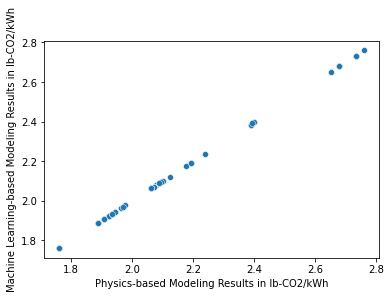

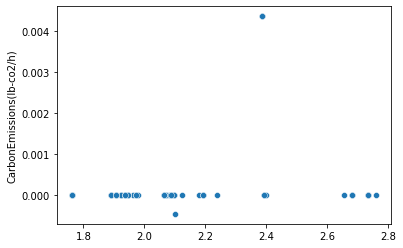

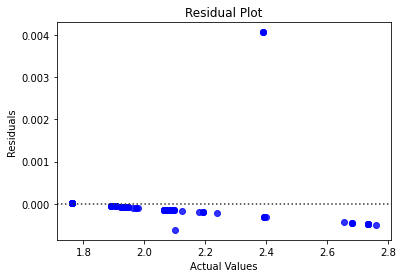

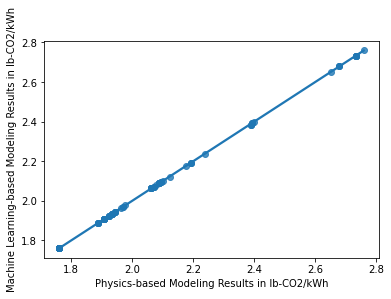

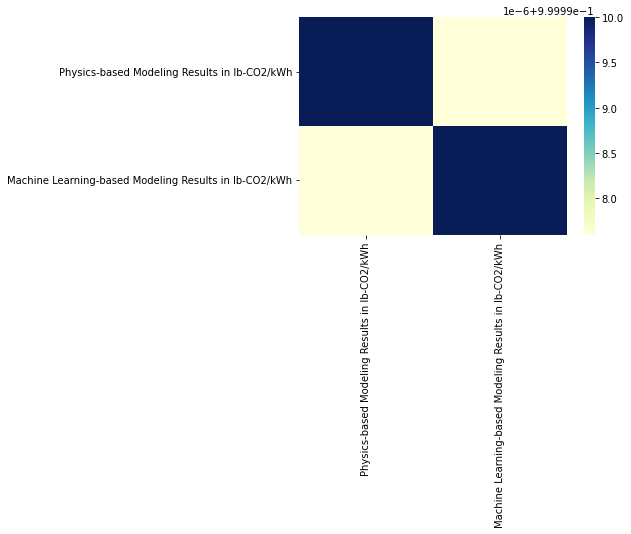

In [25]:


### Scatter plot

# Create scatter plot of true vs predicted values
scatter = sns.scatterplot(x='Physics-based Modeling Results in lb-CO2/kWh', y='Machine Learning-based Modeling Results in lb-CO2/kWh', data=WriteData)
plt.show()

# Create scatter plot of residuals
residuals = y_test - y_pred
scatter_residual = sns.scatterplot(x=y_pred, y=residuals)
plt.show()

### Residual Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe to hold the residuals
residuals = y_test - y_pred
residual_df = pd.DataFrame({'residuals': residuals, 'y_test': y_test})

# Create the residual plot using seaborn
sns.residplot(x='y_test', y='residuals', data=residual_df, color='blue')

# Set the plot title and axis labels
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

### Regression plot

# Create scatter plot with regression line
regression = sns.regplot(x='Physics-based Modeling Results in lb-CO2/kWh', y='Machine Learning-based Modeling Results in lb-CO2/kWh', data=WriteData)
plt.show()

### Correlation plot

corr = WriteData.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")
plt.show()



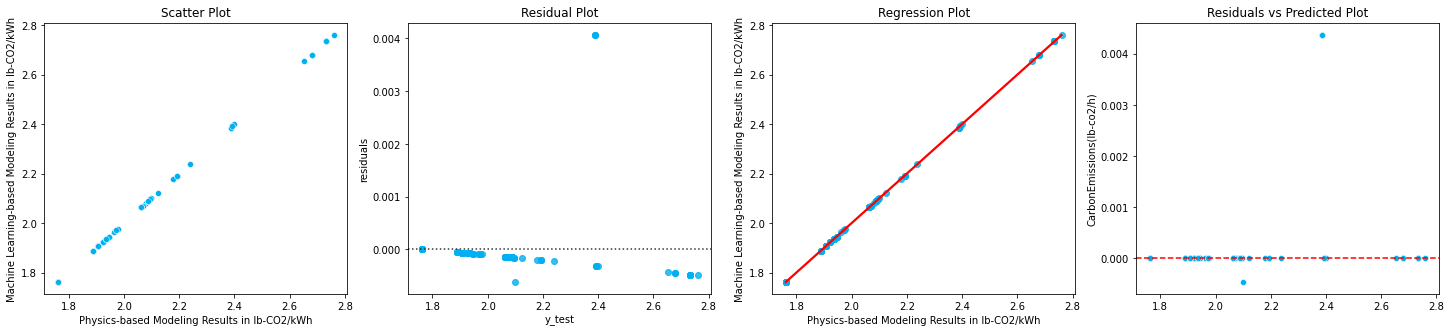

In [26]:
# # Create the subplots
# fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(25,5))

# # Scatter plot
# sns.scatterplot(x='Physics-based Modeling Results in lb-CO2/kWh', y='Machine Learning-based Modeling Results in lb-CO2/kWh', data=WriteData, ax=axs[0], color='#00B0F0')
# axs[0].set_title('Scatter Plot')

# # Residual plot
# sns.residplot(x='y_test', y='residuals', data=residual_df, color='#00B0F0', ax=axs[1])
# axs[1].set_title('Residual Plot')

# # Regression plot
# #sns.regplot(x='Physics-based Modeling Results in lb-CO2/kWh', y='Machine Learning-based Modeling Results in lb-CO2/kWh', data=WriteData, ax=axs[2], color='red')
# sns.regplot(x='Physics-based Modeling Results in lb-CO2/kWh', y='Machine Learning-based Modeling Results in lb-CO2/kWh', data=WriteData, ax=axs[2], color='red', scatter_kws={'color':'#00B0F0'})

# axs[2].set_title('Regression Plot')

# # Residuals vs predicted plot
# sns.scatterplot(x=y_pred, y=residuals, color='#00B0F0', ax=axs[3])
# axs[3].axhline(y=0, color='red', linestyle='--')
# axs[3].set_title('Residuals vs Predicted Plot')

# # Save the plot
# plt.savefig('four_plots.png')

# # Show the plot
# plt.show()


In [ ]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create the regression plot with comparison line
sns.regplot(x='Physics-based Modeling Results in lb-CO2/kWh', y='Machine Learning-based Modeling Results in lb-CO2/kWh', data=WriteData, color='red', line_kws={'color': 'blue', 'linestyle': '--'})

# Add title and axis labels
plt.title('Comparison between physics-based simulation and ML-based simulation results')
plt.xlabel('Physics-based Modeling Results in lb-CO2/kWh')
plt.ylabel('Machine Learning-based Modeling Results in lb-CO2/kWh')

# Add legend
plt.legend(labels=['Physics-based simulation results', 'ML-based simulation results'])

# Show the plot
plt.show()

